In [2]:
import os
import tarfile
import urllib

<h2>Function to fetch and load the dataset</h2>

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    print('Created:', housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

Created: datasets/housing


In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h3>Distribution of the categorical attribute</h3>

In [8]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


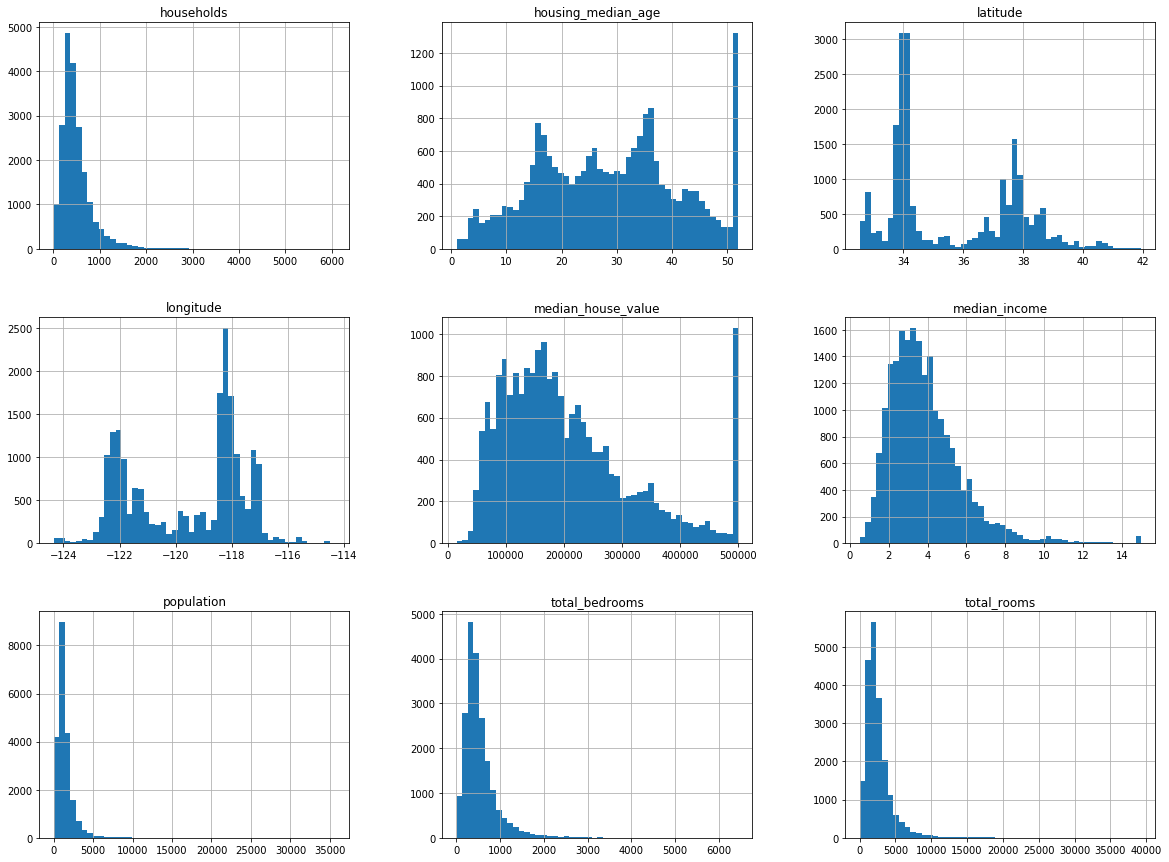

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=2020)


In [12]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6847,-118.14,34.07,42.0,1036.0,199.0,656.0,215.0,4.1902,235000.0,<1H OCEAN
17018,-122.29,37.52,38.0,3767.0,603.0,1455.0,615.0,6.8787,386800.0,NEAR OCEAN
15399,-117.20,33.20,16.0,4409.0,629.0,1875.0,609.0,5.5430,286400.0,<1H OCEAN
18714,-122.42,40.57,10.0,7949.0,1309.0,3176.0,1163.0,4.1099,120100.0,INLAND
1742,-122.35,37.96,36.0,2191.0,531.0,1563.0,524.0,2.5164,114200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
10783,-117.91,33.64,40.0,1958.0,333.0,876.0,364.0,3.6406,326100.0,<1H OCEAN
17033,-122.26,37.51,29.0,3703.0,1075.0,1611.0,1025.0,2.7075,323800.0,NEAR OCEAN
12565,-121.44,38.54,44.0,2570.0,509.0,1145.0,503.0,2.5694,92400.0,INLAND
14158,-117.08,32.76,27.0,1221.0,254.0,606.0,259.0,3.0833,155400.0,NEAR OCEAN


<h2>Divide the income attribute into 5 categories</h2>

In [13]:
import numpy as np

df["income_cat"] = pd.cut(df["median_income"], 
                         bins=[0., 1.5,  3.0, 4.5, 6., np.inf],
                         labels=[1, 2, 3, 4, 5])

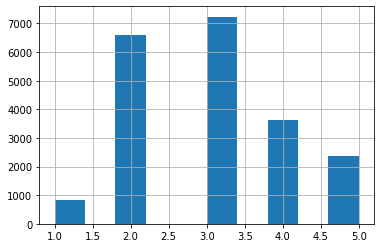

In [14]:
df["income_cat"].hist()

In [15]:
df["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2020)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [17]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [18]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [19]:
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

<h3>Stratified Split is completed, drop the categorical column which was added previously</h3>

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [21]:
strat_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [22]:
housing = strat_train_set.copy()

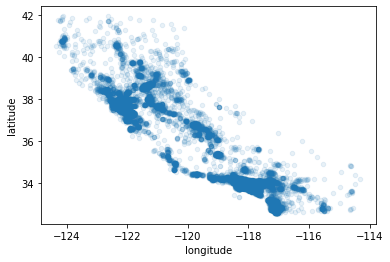

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

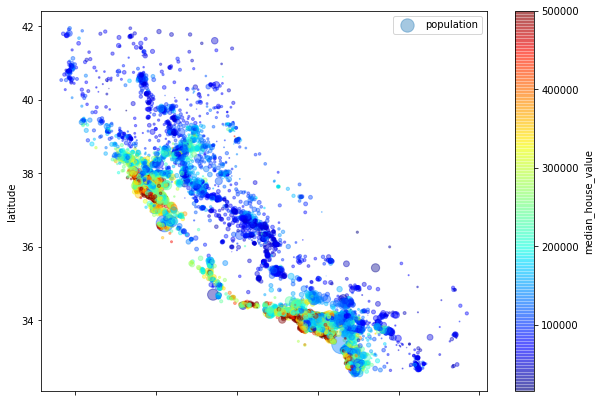

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bca1050>,
      dtype=object)

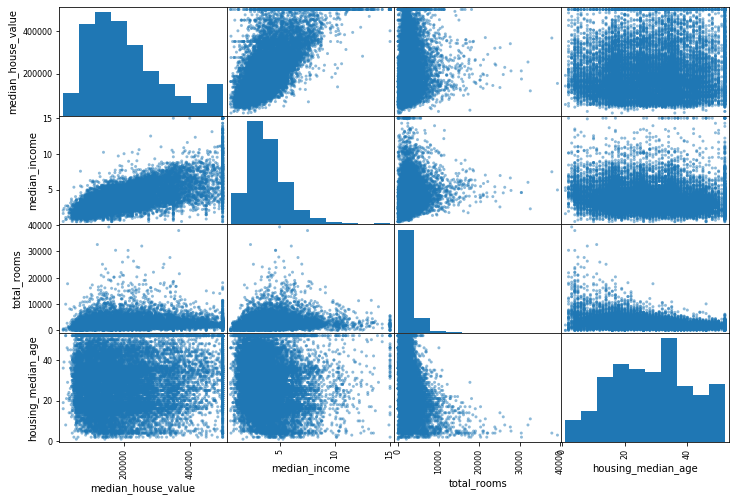

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

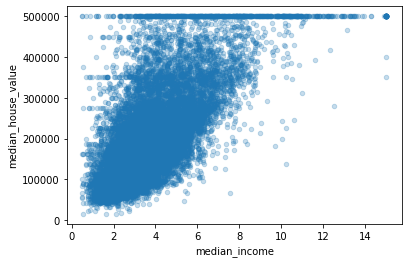

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.25)

In [27]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [28]:
len(housing["total_bedrooms"]) > len(housing["total_rooms"])

False

In [29]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688929
rooms_per_household         0.161417
total_rooms                 0.132029
housing_median_age          0.104036
households                  0.066047
total_bedrooms              0.049387
population_per_household   -0.022106
population                 -0.024635
longitude                  -0.045222
latitude                   -0.145759
bedrooms_per_room          -0.252314
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels 
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
# fit the imputer instance to the training data
imputer.fit(housing_num)

print(imputer.statistics_)

[-118.5       34.26      29.      2122.       433.5     1165.
  408.5        3.53875]


In [33]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2122.     ,  433.5    ,
       1165.     ,  408.5    ,    3.53875])

In [34]:
X = imputer.transform(housing_num)

In [35]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [36]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13143,-121.54,38.29,47.0,1396.0,254.0,630.0,218.0,2.8616
4017,-118.60,34.15,28.0,4570.0,744.0,1693.0,695.0,6.1400
1408,-122.06,37.94,19.0,4005.0,972.0,1896.0,893.0,2.5268
20076,-120.40,38.06,12.0,1430.0,310.0,517.0,240.0,2.6544
8724,-118.36,33.83,35.0,1378.0,247.0,645.0,217.0,5.9143


In [37]:
housing_cat = housing[["ocean_proximity"]]

In [38]:
housing_cat_n = housing["ocean_proximity"]

In [39]:
type(housing_cat)

pandas.core.frame.DataFrame

In [40]:
type(housing_cat_n)

pandas.core.series.Series

In [41]:
housing_cat.head()

,ocean_proximity
13143,INLAND
4017,<1H OCEAN
1408,NEAR BAY
20076,INLAND
8724,<1H OCEAN


In [42]:
housing_cat["ocean_proximity"].unique()

array(['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [43]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.]])

In [44]:
ordinal_encoder.categories_ == housing_cat["ocean_proximity"].unique()

array([[False, False, False, False, False]])

In [45]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
# Convert the sparse matrix to numpy array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [47]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [50]:
len(housing_extra_attribs[0])

11

In [51]:
len(housing.columns)

9

In [52]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [54]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13143,-121.54,38.29,47.0,1396.0,254.0,630.0,218.0,2.8616
4017,-118.60,34.15,28.0,4570.0,744.0,1693.0,695.0,6.1400
1408,-122.06,37.94,19.0,4005.0,972.0,1896.0,893.0,2.5268
20076,-120.40,38.06,12.0,1430.0,310.0,517.0,240.0,2.6544
8724,-118.36,33.83,35.0,1378.0,247.0,645.0,217.0,5.9143
...,...,...,...,...,...,...,...,...
19192,-122.68,38.45,36.0,1686.0,303.0,744.0,304.0,4.0139
5571,-118.29,33.87,32.0,1700.0,340.0,864.0,317.0,4.3810
10292,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327
12920,-121.31,38.66,26.0,1604.0,245.0,751.0,267.0,4.7381


In [55]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)

In [56]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [57]:
type(housing_num)

pandas.core.frame.DataFrame

In [58]:
type(num_attribs)

list

In [59]:
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

<b>Select and Train a Model</b>

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
housing_prepared[0]

array([-0.98322883,  1.24682673,  1.45453937, -0.56367654, -0.66890595,
       -0.69419568, -0.73137471, -0.53269836,  0.44001472, -0.01847908,
       -0.47927655,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

In [62]:
housing_extra_attribs.shape

(16512, 11)

In [63]:
housing_prepared.shape


(16512, 16)

In [64]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [137956.75615791 329050.91590395 195393.9574616   78921.3150396
 312160.31037651]
Labels: [92500.0, 361900.0, 235700.0, 128100.0, 343400.0]


In [65]:
some_data.shape

(5, 9)

In [66]:
some_data_prepared

array([[-0.98322883,  1.24682673,  1.45453937, -0.56367654, -0.66890595,
        -0.69419568, -0.73137471, -0.53269836,  0.44001472, -0.01847908,
        -0.47927655,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.48470644, -0.69523534, -0.05360975,  0.87148545,  0.4870695 ,
         0.22775521,  0.50383239,  1.19908425,  0.5164793 , -0.05763284,
        -0.76678051,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.24286364,  1.08264274, -0.76799617,  0.61601395,  1.02495196,
         0.40381921,  1.01655986, -0.70955318, -0.41365025, -0.08461222,
         0.43286891,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-0.41402944,  1.1389344 , -1.32363005, -0.54830303, -0.53679447,
        -0.79220175, -0.67440499, -0.64214973,  0.24188537, -0.08193953,
         0.04377426,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.60453789, -0.84534642,  0

In [67]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


68517.45734745667

In [68]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49556.923572930194

In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=2020)
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2020, splitter='best')

In [70]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<h1>Cross Validation</h1>

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [72]:
tree_rmse_scores

array([71520.32970547, 72827.43168352, 68234.54680726, 70701.70452467,
       67644.34497746, 71638.00303369, 69866.07182955, 73222.25254171,
       74694.53250647, 73373.62264942])

In [73]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [71520.32970547 72827.43168352 68234.54680726 70701.70452467
 67644.34497746 71638.00303369 69866.07182955 73222.25254171
 74694.53250647 73373.62264942]
Mean: 71372.28402592287
Standard deviation: 2171.0902798366255


In [74]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [75]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67895.14487686 67868.97863166 70417.07160255 71775.29869894
 67181.16805776 65564.87996987 70874.45548392 72023.23973997
 67563.89684166 68150.63762242]
Mean: 68931.47715255962
Standard deviation: 2066.613293278968


In [76]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=2020)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2020, verbose=0, warm_start=False)

In [77]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18774.819037688634

In [78]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49202.3705388  49998.75167494 48988.83338295 50864.11708883
 49898.55604849 50435.6058723  51839.78978468 52355.12488721
 49617.31268373 50219.44424988]
Mean: 50341.99062118142
Standard deviation: 1027.710228366977


In [81]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="rbf")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118562.22896931067

In [82]:
from sklearn.model_selection import GridSearchCV 

grid_param = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=2020)
# Train across 5 folds, that's a total of (3*4 + 2*3) * 5 = 90 rounds.
grid_search = GridSearchCV(forest_reg, 
                           grid_param, 
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=2020,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [83]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [84]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=2020, verbose=0, warm_start=False)

In [85]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64559.487878511456 {'max_features': 2, 'n_estimators': 3}
56241.375435510134 {'max_features': 2, 'n_estimators': 10}
52809.5394039349 {'max_features': 2, 'n_estimators': 30}
59567.90070471842 {'max_features': 4, 'n_estimators': 3}
52436.17248542646 {'max_features': 4, 'n_estimators': 10}
50139.75934354465 {'max_features': 4, 'n_estimators': 30}
60139.946040923096 {'max_features': 6, 'n_estimators': 3}
52169.8360350174 {'max_features': 6, 'n_estimators': 10}
49676.8511703488 {'max_features': 6, 'n_estimators': 30}
58629.75400981412 {'max_features': 8, 'n_estimators': 3}
51943.30090172129 {'max_features': 8, 'n_estimators': 10}
50158.138107317645 {'max_features': 8, 'n_estimators': 30}
62390.69585792838 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54442.37569416415 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60363.61405549022 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52612.563744373 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

<h3>Evaluate on the Test Set</h3>

In [86]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [87]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([45935.8916393 , 49999.71985399])